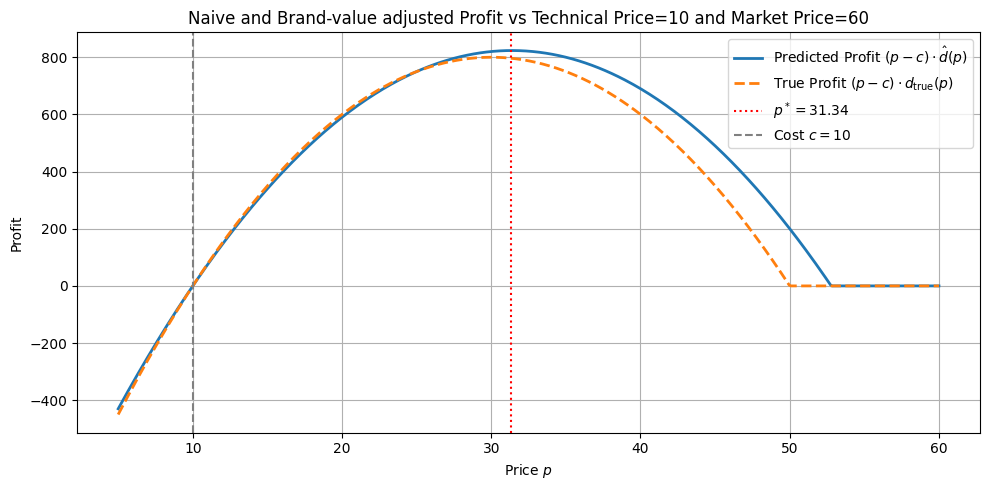

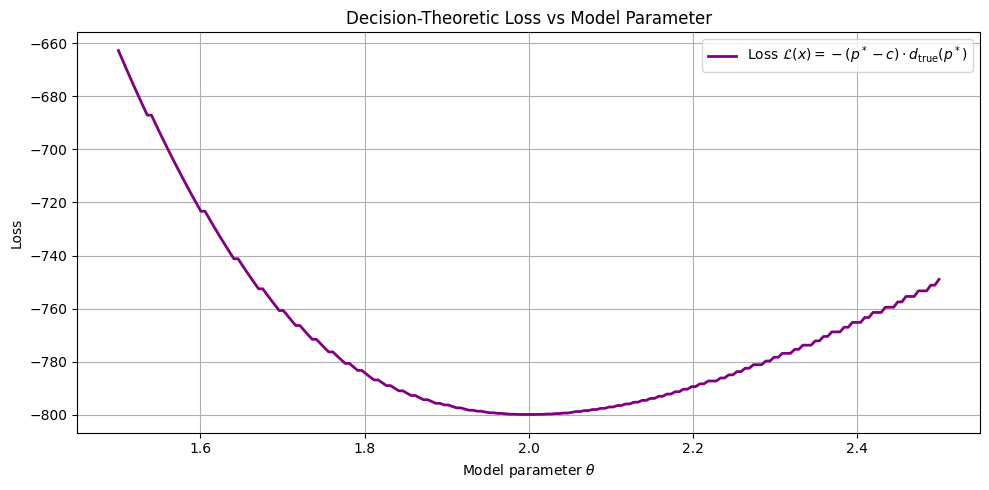

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Setup: true demand function and predicted demand function
def true_demand(p):
    return np.maximum(100 - 2 * p, 0)  # True demand: linear and capped at 0

def predicted_demand(p):
    return np.maximum(95 - 1.8 * p, 0)  # Slightly misestimated demand

# Cost value
c = 10

# Prices to evaluate
p_values = np.linspace(5, 60, 500)
profit = (p_values - c) * predicted_demand(p_values)
true_profit = (p_values - c) * true_demand(p_values)

# Optimal predicted price
optimal_index = np.argmax(profit)
p_star = p_values[optimal_index]

# First plot: Profit curve by price
plt.figure(figsize=(10, 5))
plt.plot(p_values, profit, label=r'Predicted Profit $(p - c) \cdot \hat{d}(p)$', linewidth=2)
plt.plot(p_values, true_profit, '--', label=r'True Profit $(p - c) \cdot d_{\mathrm{true}}(p)$', linewidth=2)
plt.axvline(p_star, color='red', linestyle=':', label=fr'$p^* = {p_star:.2f}$')
plt.axvline(c, color='grey', linestyle='--', label=fr'Cost $c = {c}$')
plt.xlabel('Price $p$')
plt.ylabel('Profit')
plt.title('Naive and Brand-value adjusted Profit vs Technical Price=10 and Market Price=60')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Second plot: Loss function as a function of parameter theta
theta_values = np.linspace(1.5, 2.5, 200)
loss_values = []
for theta in theta_values:
    pred_demand_theta = lambda p: np.maximum(100 - theta * p, 0)
    profit_theta = (p_values - c) * pred_demand_theta(p_values)
    p_star_theta = p_values[np.argmax(profit_theta)]
    true_profit_at_p_star = (p_star_theta - c) * true_demand(p_star_theta)
    loss = -true_profit_at_p_star
    loss_values.append(loss)

# Second plot
plt.figure(figsize=(10, 5))
plt.plot(theta_values, loss_values, label=r'Loss $\mathcal{L}(x) = - (p^* - c) \cdot d_{\mathrm{true}}(p^*)$', color='purple', linewidth=2)
plt.xlabel(r'Model parameter $\theta$')
plt.ylabel('Loss')
plt.title('Decision-Theoretic Loss vs Model Parameter')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
